In [74]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in the Data

In [75]:
in_dir = "C:\\Users\\st50\\OneDrive - Queen's University\\Courses\\201908_MBAS_862\\Datasets"
out_dir = in_dir

%time kiva_df=pd.read_csv(os.path.join(in_dir, "kiva_cleaned.csv"))
#kiva_df = kiva_df.sample(frac=0.1)

kiva_df.dropna(inplace=True)


list(kiva_df)
kiva_df.info()
kiva_df.shape
kiva_df.head()
kiva_df.tail()

Wall time: 371 ms


['loan_id',
 'status',
 'sector',
 'en',
 'country',
 'gender',
 'loan_amount',
 'nonpayment',
 'en_clean']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6802 entries, 0 to 6817
Data columns (total 9 columns):
loan_id        6802 non-null int64
status         6802 non-null object
sector         6802 non-null object
en             6802 non-null object
country        6802 non-null object
gender         6802 non-null object
loan_amount    6802 non-null float64
nonpayment     6802 non-null object
en_clean       6802 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 531.4+ KB


(6802, 9)

,loan_id,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
0,0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,"Robert, 40, is married and has 6 children. In ..."
1,1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,"Petronilla, 30, was deserted by her husband an..."
2,2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,"Tom Mung'ahu, 45, is married and has 6 childre..."
3,3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,"Benedina, 42, is married and has 4 girls. In a..."
4,4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,"Vincent Ondego 40, is married and has 8 childr..."


,loan_id,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
6813,7983,paid,Clothing,Rosa is a member of the 3 de Mayo Communal Ban...,Ecuador,F,1050.0,lender,Rosa is a member of the 3 de Mayo Communal Ban...
6814,7984,paid,Agriculture,"The communal bank, ""Cumbe,"" is located on the ...",Ecuador,F,2650.0,partner,"The communal bank, ""Cumbe,"" is located on the ..."
6815,7985,paid,Food,Gladys Burgos Macas is a member of the 3 de Ma...,Ecuador,F,775.0,partner,Gladys Burgos Macas is a member of the 3 de Ma...
6816,7986,paid,Retail,The Communal Bank <em>Las Caleras</em> is loca...,Ecuador,F,275.0,partner,The Communal Bank Las Caleras is located in th...
6817,7987,paid,Services,Eliud Ouma owns the Purple Hut salon located o...,Kenya,M,275.0,partner,Eliud Ouma owns the Purple Hut salon located o...


# EDA

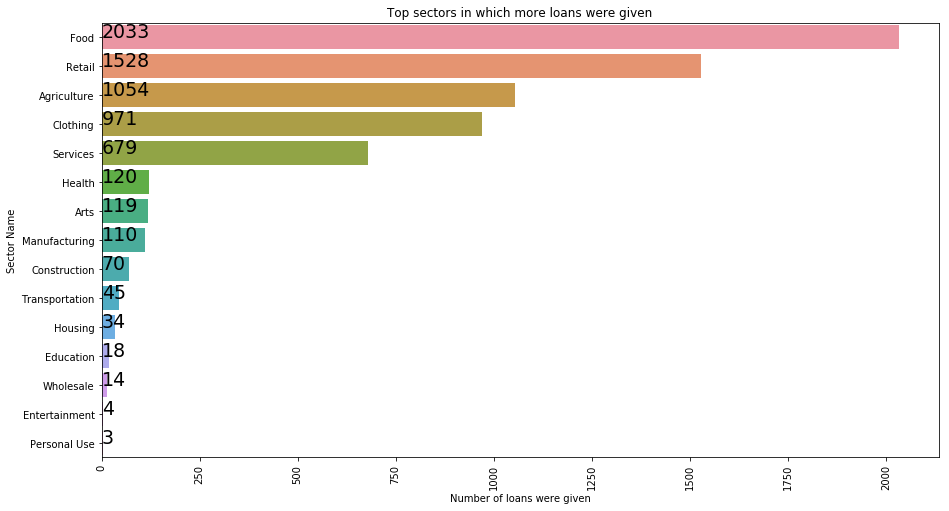

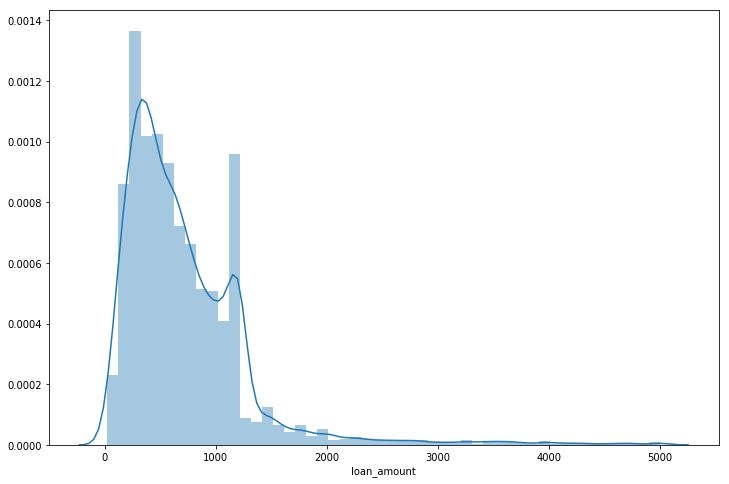

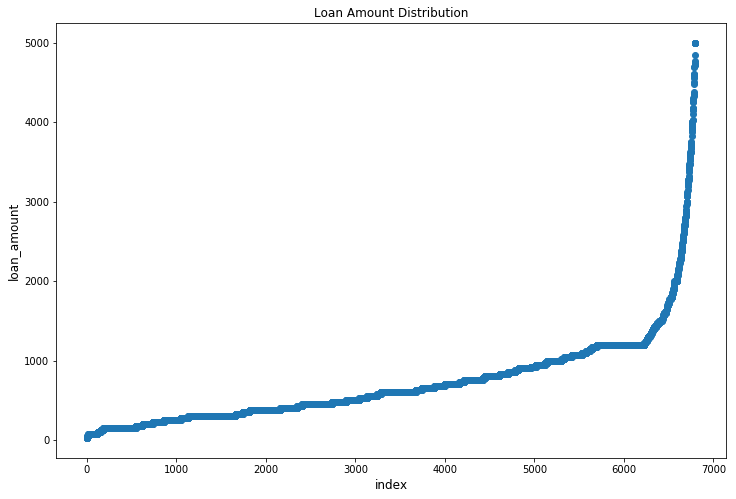

In [76]:
%matplotlib inline
color = sns.color_palette()


plt.figure(figsize=(15,8));
sector_name = kiva_df['sector'].value_counts();
sns.barplot(sector_name.values, sector_name.index);
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19);
plt.xticks(rotation='vertical');
plt.xlabel('Number of loans were given');
plt.ylabel('Sector Name');
plt.title("Top sectors in which more loans were given");
plt.show();
#Food is in the top sectors

plt.figure(figsize = (12, 8));

sns.distplot(kiva_df['loan_amount']);
plt.show() ;


plt.figure(figsize = (12, 8));
plt.scatter(range(kiva_df.shape[0]), np.sort(kiva_df.loan_amount.values));
plt.xlabel('index', fontsize=12);
plt.ylabel('loan_amount', fontsize=12);
plt.title("Loan Amount Distribution");
plt.show();

# Encoding

In [77]:
cols = ['sector', 'country', 'gender', 'nonpayment']

kiva_df = pd.concat([kiva_df, pd.get_dummies(kiva_df[cols])],axis=1)
kiva_df = kiva_df.drop(cols, axis=1)
kiva_df.head()

,loan_id,status,en,loan_amount,en_clean,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,...,sector_Services,sector_Transportation,sector_Wholesale,country_Dominican Republic,country_Ecuador,country_Kenya,gender_F,gender_M,nonpayment_lender,nonpayment_partner
0,0,defaulted,<i>This description is written by Rowland Amul...,500.0,"Robert, 40, is married and has 6 children. In ...",1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,1,defaulted,<i>This description is written by Rowland Amul...,500.0,"Petronilla, 30, was deserted by her husband an...",0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,defaulted,<i>This description was written by Richard Maz...,500.0,"Tom Mung'ahu, 45, is married and has 6 childre...",0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,3,defaulted,<i>This description was written by Rowland Amu...,500.0,"Benedina, 42, is married and has 4 girls. In a...",0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4,4,defaulted,<i>This description was written by Rowland Amu...,500.0,"Vincent Ondego 40, is married and has 8 childr...",0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0


# Feature Extraction

In [78]:
import textstat

def preprocess(x):
    return textstat.flesch_reading_ease(x)
    
%time kiva_df['len'] = kiva_df['en_clean'].apply(lambda x: len(x))
%time kiva_df['syllable_count'] = kiva_df['en_clean'].apply(lambda x: textstat.syllable_count(x))
%time kiva_df['lexicon_count'] = kiva_df['en_clean'].apply(lambda x: textstat.lexicon_count(x))
%time kiva_df['sentence_count'] = kiva_df['en_clean'].apply(lambda x: textstat.sentence_count(x))
%time kiva_df['flesch_reading_ease'] = kiva_df['en_clean'].apply(lambda x: textstat.flesch_reading_ease(x))
%time kiva_df['flesch_kincaid_grade'] = kiva_df['en_clean'].apply(lambda x: textstat.flesch_kincaid_grade(x))
%time kiva_df['gunning_fog'] = kiva_df['en_clean'].apply(lambda x: textstat.gunning_fog(x))

kiva_df.head()

Wall time: 6.03 ms
Wall time: 5.52 s
Wall time: 1.85 s
Wall time: 1.93 s
Wall time: 10 s
Wall time: 9.29 s
Wall time: 8.11 s


,loan_id,status,en,loan_amount,en_clean,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,...,gender_M,nonpayment_lender,nonpayment_partner,len,syllable_count,lexicon_count,sentence_count,flesch_reading_ease,flesch_kincaid_grade,gunning_fog
0,0,defaulted,<i>This description is written by Rowland Amul...,500.0,"Robert, 40, is married and has 6 children. In ...",1,0,0,0,0,...,1,1,0,719,187,126,10,67.15,7.0,9.17
1,1,defaulted,<i>This description is written by Rowland Amul...,500.0,"Petronilla, 30, was deserted by her husband an...",0,0,0,0,0,...,0,1,0,1096,275,191,13,73.47,6.7,8.18
2,2,defaulted,<i>This description was written by Richard Maz...,500.0,"Tom Mung'ahu, 45, is married and has 6 childre...",0,0,0,0,0,...,1,1,0,688,175,123,9,74.49,6.3,8.41
3,3,defaulted,<i>This description was written by Rowland Amu...,500.0,"Benedina, 42, is married and has 4 girls. In a...",0,0,0,0,0,...,0,1,0,591,150,102,7,65.12,7.8,8.98
4,4,defaulted,<i>This description was written by Rowland Amu...,500.0,"Vincent Ondego 40, is married and has 8 childr...",0,0,0,1,0,...,1,1,0,659,172,122,10,76.01,5.7,6.85


# BOW - TFIDF

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.5, ngram_range=[1,3], max_features=500, stop_words='english')
%time dtm_tfidf = tfidf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df_tfidf.shape

kiva_df_bow_tfidf = pd.concat([kiva_df, bow_df_tfidf], axis=1)
kiva_df_bow_tfidf.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow_tfidf.shape
kiva_df_bow_tfidf.head()

Wall time: 7.79 s


(6802, 500)

(6802, 532)

,loan_id,status,loan_amount,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,...,works,year,year old,years ago,years experience,years old,years old children,years old married,years old single,young
0,0,defaulted,500.0,1,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,defaulted,500.0,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,defaulted,500.0,0,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,defaulted,500.0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,defaulted,500.0,0,0,0,1,0,0,0,...,0.0,0.114551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Bring in Topics from WordStat

In [80]:
#%time kiva_df_bow_tfidf.to_csv('kiva_df_bow_tfidf.csv', index=False)
%time kiva_theta=pd.read_csv(os.path.join(in_dir, "kiva_theta.csv"))

Wall time: 93.5 ms


In [81]:
kiva_df_bow_tfidf = kiva_df_bow_tfidf.merge(kiva_theta, how='left', on='loan_id')

In [82]:
kiva_df_bow_tfidf.head()

,loan_id,status,loan_amount,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,...,SEWING MACHINE,SINGLE MOTHER;BOYS,SOURCE OF INCOME,STARTED HER BUSINESS,SUCCESSFULLY REPAID,TAKES CARE,UNIVERSITY STUDIES,WHOLESALE PRICES,WOMENS CLOTHING,YEARS AGO
0,0,defaulted,500.0,1,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
1,1,defaulted,500.0,0,0,0,0,0,0,1,...,0,1,0,3,0,1,0,0,0,1
2,2,defaulted,500.0,0,0,0,0,0,0,1,...,0,1,1,4,0,0,0,0,0,0
3,3,defaulted,500.0,0,0,0,0,0,0,0,...,0,0,0,2,0,2,0,0,0,1
4,4,defaulted,500.0,0,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,0


# Model Development

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

y = kiva_df_bow_tfidf['status']
X = kiva_df_bow_tfidf.drop(['loan_id', 'status'], axis=1)

feature_names = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

clf = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=10, max_depth=6)

#, criterion="entropy",
#                             min_samples_split=10, min_samples_leaf=10, max_depth=10, max_leaf_nodes=50)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)


class_names = [str(x) for x in clf.classes_]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [105]:
clf.feature_importances_

array([2.78514691e-02, 2.54419590e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00480553e-01, 0.00000000e+00, 3.84465477e-03, 0.00000000e+00,
       0.00000000e+00, 6.23725855e-01, 0.00000000e+00, 0.00000000e+00,
       1.56865403e-02, 5.75211668e-03, 0.00000000e+00, 0.00000000e+00,
       1.26685178e-02, 5.16286316e-03, 0.00000000e+00, 0.00000000e+00,
       6.66756710e-04, 0.00000000e+00, 0.00000000e+00, 3.89472963e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [97]:
imp = clf.tree_.compute_feature_importances(normalize=False)
ind = sorted(range(len(imp)), key=lambda i: imp[i])[-15:]

imp[ind]
feature_names[ind]

array([0.00203177, 0.00226366, 0.00235474, 0.00308791, 0.00351903,
       0.0049855 , 0.00515524, 0.0061732 , 0.00756813, 0.00920174,
       0.01096052, 0.01378197, 0.02220396, 0.0395426 , 0.24545785])

Index(['gunning_fog', 'lexicon_count', 'believes', 'allow', 'kiva',
       'flesch_kincaid_grade', 'hopes business', 'syllable_count', 'shell',
       'ksh', 'loan_amount', 'rice', 'entrepreneur',
       'country_Dominican Republic', 'nonpayment_lender'],
      dtype='object')

In [106]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[771,  81],
       [ 83, 766]], dtype=int64)

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

   defaulted       0.90      0.90      0.90       852
        paid       0.90      0.90      0.90       849

    accuracy                           0.90      1701
   macro avg       0.90      0.90      0.90      1701
weighted avg       0.90      0.90      0.90      1701



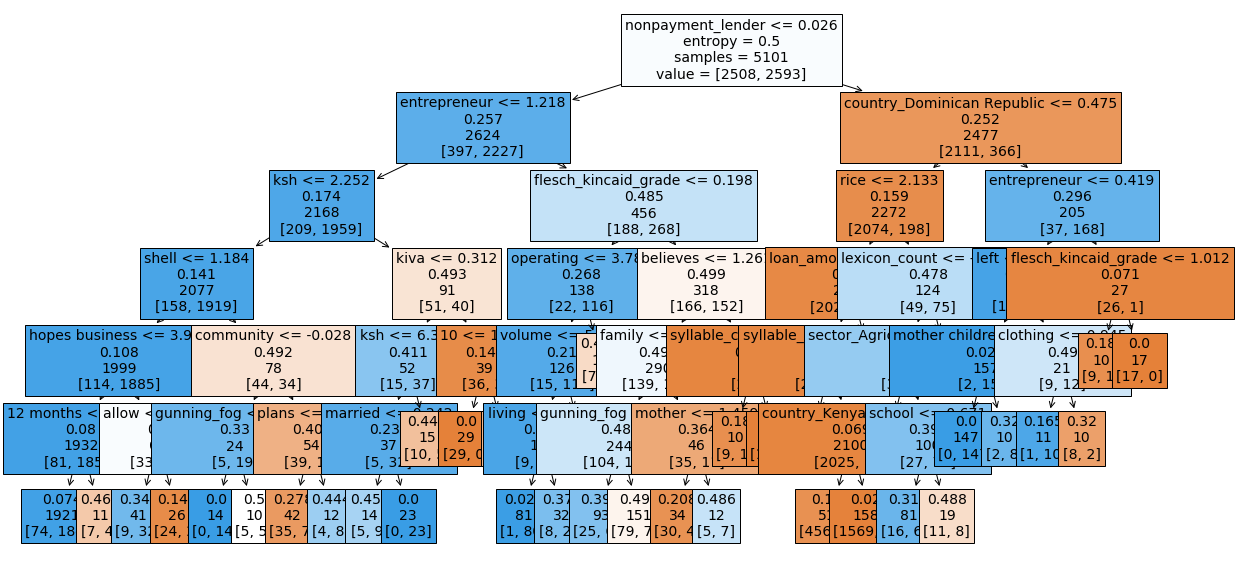

In [108]:
# Needs sklearn 0.21 or higher
from sklearn.tree import plot_tree

plt.figure(figsize=[20,10]);
plot_tree(clf, filled=True, feature_names = feature_names, label='root', fontsize=14)
plt.show();

In [110]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

print("NB")

gnb = GaussianNB()
%time gnb = gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

gnb.theta_


print("\n\nKNN")
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


print("\n\nRF")
clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=55)
%time clf.fit(X_train, y_train)

imp = pd.DataFrame(clf.feature_importances_, index = feature_names, columns=['importance']).sort_values('importance', ascending=False).iloc[0:15,:]
print(imp)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("\n\nAdaboost")
clf = AdaBoostClassifier(n_estimators=200)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("\n\nGTB")
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



NB
Wall time: 136 ms
0.733098177542622
[[576 276]
 [178 671]]
              precision    recall  f1-score   support

   defaulted       0.76      0.68      0.72       852
        paid       0.71      0.79      0.75       849

    accuracy                           0.73      1701
   macro avg       0.74      0.73      0.73      1701
weighted avg       0.74      0.73      0.73      1701



array([[-0.12453786,  0.18993409,  0.04903353, ..., -0.03960612,
        -0.0663054 ,  0.0478909 ],
       [ 0.12826928, -0.2001445 , -0.05696046, ...,  0.00718177,
         0.06491853, -0.03628377]])



KNN


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

0.6090534979423868
[[203 649]
 [ 16 833]]
              precision    recall  f1-score   support

   defaulted       0.93      0.24      0.38       852
        paid       0.56      0.98      0.71       849

    accuracy                           0.61      1701
   macro avg       0.74      0.61      0.55      1701
weighted avg       0.74      0.61      0.55      1701



RF
Wall time: 13.2 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=55, verbose=0,
                       warm_start=False)

                              importance
nonpayment_lender               0.150256
nonpayment_partner              0.145889
country_Kenya                   0.036997
repay loan                      0.025763
country_Dominican Republic      0.025450
MUNICIPAL LICENSE               0.017260
requesting                      0.014898
MONTHLY BASIS;REPAY HER LOAN    0.014071
loan_amount                     0.013880
repay                           0.013055
sentence_count                  0.009619
married                         0.008874
DOMINICAN REPUBLIC              0.008320
requesting loan                 0.007335
flesch_reading_ease             0.006980
0.9106407995296885
[[732 120]
 [ 32 817]]
              precision    recall  f1-score   support

   defaulted       0.96      0.86      0.91       852
        paid       0.87      0.96      0.91       849

    accuracy                           0.91      1701
   macro avg       0.92      0.91      0.91      1701
weighted avg       0.92      0

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

0.9041740152851264
[[766  86]
 [ 77 772]]
              precision    recall  f1-score   support

   defaulted       0.91      0.90      0.90       852
        paid       0.90      0.91      0.90       849

    accuracy                           0.90      1701
   macro avg       0.90      0.90      0.90      1701
weighted avg       0.90      0.90      0.90      1701



GTB
Wall time: 9.27 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=45, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.9065255731922398
[[776  76]
 [ 83 766]]
              precision    recall  f1-score   support

   defaulted       0.90      0.91      0.91       852
        paid       0.91      0.90      0.91       849

    accuracy                           0.91      1701
   macro avg       0.91      0.91      0.91      1701
weighted avg       0.91      0.91      0.91      1701



In [ ]:
\